# BACTERIA

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [3]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [4]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [5]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-0vkqi20z/13518b11-8587-4666-b7b2-0b11351ab314/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-2czjbab1/10c3dca9-6218-4b2a-94f6-e323cb74ea81/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-2czjbab1/10c3dca9-6218-4b2a-94f6-e323cb74ea81/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.13 seconds: Joined    100 of    400
      0.28 seconds: Joined    300 of    400
Initial topology in 0.34 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.38 seconds: ME NNI round 2 of 35, 301 of 401 splits, 35 changes (max delta 0.108)
      0.53 seconds: SPR round   1 of   2, 101 of 804 nodes
      0.73 seconds: SPR round   1 of   2, 301 of 804 nodes
      0.83 seconds: SPR round   1 of   2, 401 of 804 nodes
      0.94 seconds: SPR round   1 of   2, 501 of 804 nodes
      1.07 seconds: SPR round   1 of   2, 601 of 804 nodes
      1.1

## ALPHA AND BETA DIVERSITY

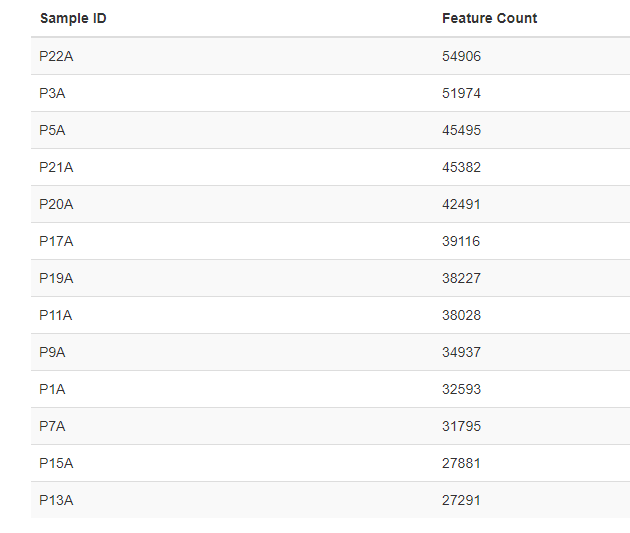

In [6]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [7]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [8]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/ba_alpha_rarefaction_plot.png')

In [9]:
qzv_file_alpha

<visualization: Visualization uuid: caaa43da-3fef-4226-9c91-3c3c5251f23d>

### ALPHA DIVERSITY

In [10]:
# set sampling_depth based on alpha rarefacation curve
# normalization step
depth = 27291
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005952608556737737 and the largest is 1.4037160491507266.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-av6sx1n4/ea6e1d25-e686-4d7e-bfcf-fcbc2ab73d72/data/feature-table.biom -t /tmp/qiime2-archive-grpjn9yk/b30b2cd1-7408-46ce-88ab-af1e51415d77/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-fd7po8b0

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-av6sx1n4/ea6e1d25-e686-4d7e-bfcf-fcbc2ab73d72/data/feature-table.biom -t /tmp/qiime2-archive-grpjn9yk/b30b2cd1-7408-46ce-88ab-af1e51415d77/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-rxdk2_v3

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0021327820720092837 and the largest is 0.1553963443112255.


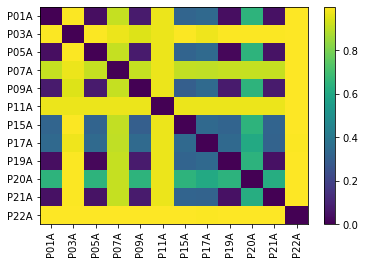

In [11]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

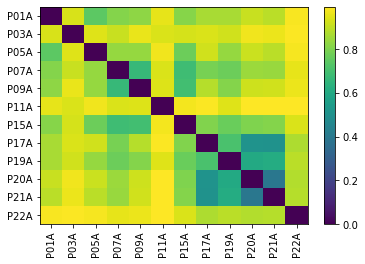

In [12]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [13]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 7a2a0d9b-0bcf-4cd1-8768-4cb695ce1f52>

In [ ]:
diversity.visualizers.alpha_rarefaction()

In [14]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_ba,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
#    steps =  100
# )

# # save alpha_rarefacion
# alpha_rarefaction.visualization.save('./results/alpha_rar.qzv')

In [15]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_rar.qzv')
alpha_rar

<visualization: Visualization uuid: 84638aec-9c7e-43b5-80a9-86b5f83eba09>

In [50]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson', 'simpson_e']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df= pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

observed_features  fisher_alpha       chao1  shannon_entropy  \
Sample ID                                                                 
P01A                    30.0      3.328980   37.500000         0.342088   
P03A                    81.0     10.272369   81.000000         4.178791   
P05A                    19.0      1.995016   20.000000         0.118272   
P07A                    52.0      6.197573   53.200000         2.277559   
P09A                    24.0      2.591147   25.250000         0.482597   
P11A                    89.0     11.443553   89.000000         5.284557   
P15A                    40.0      4.604325   43.111111         1.495559   
P17A                   120.0     16.143365  120.000000         2.742021   
P19A                    45.0      5.260529   54.428571         0.181783   
P20A                    81.0     10.272369   81.500000         1.895221   
P21A                    73.0      9.120273   84.250000         0.505607   
P22A                    98.0     12.782554  102.000000         3.965160   

            simpson  simpson_e  
Sample ID                       
P01A       0.073700   0.035985  
P03A       0.876984   0.100358  
P05A       0.022553   0.053846  
P07A       0.708911   0.066065  
P09A       0.137594   0.048314  
P11A       0.957211   0.262590  
P15A       0.498991   0.049899  
P17A       0.562882   0.019064  
P19A       0.033571   0.022994  
P20A       0.607079   0.031420  
P21A       0.097858   0.015185  
P22A       0.876302   0.082492

<AxesSubplot:xlabel='index', ylabel='observed_features'>

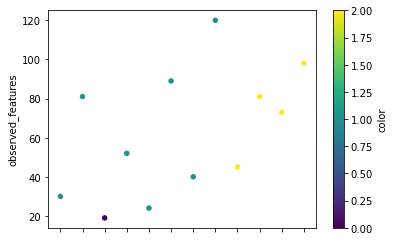

In [51]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
ndf["color"] = ndf.groupby("population").ngroup()
ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [52]:
ndf.head()

observed_features  fisher_alpha  chao1  shannon_entropy   simpson  \
P01A               30.0      3.328980  37.50         0.342088  0.073700   
P03A               81.0     10.272369  81.00         4.178791  0.876984   
P05A               19.0      1.995016  20.00         0.118272  0.022553   
P07A               52.0      6.197573  53.20         2.277559  0.708911   
P09A               24.0      2.591147  25.25         0.482597  0.137594   

      simpson_e sample        location       origin  year parkelj specimen  \
P01A   0.035985   P01A  Planinska_jama    Paa200_t0  2015      no   Paa200   
P03A   0.100358   P03A  Planinska_jama    Paa201_t0  2015      no   Paa201   
P05A   0.053846   P05A           Stobe  Paa204_t10d  2016      no   Paa204   
P07A   0.066065   P07A  Planinska_jama    Paa209_t0  2017      no   Paa209   
P09A   0.048314   P09A  Planinska_jama    Paa210_t0  2019      no   Paa210   

                   population  color  
P01A  linija reke Ljubljanice      1  
P03A  linija reke Ljubljanice      1  
P05A         dolenjska linija      0  
P07A  linija reke Ljubljanice      1  
P09A  linija reke Ljubljanice      1

In [42]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

df = pd.concat([df1, df2])
df

year               population       value               type
P01A  2015  linija reke Ljubljanice   30.000000  observed_features
P03A  2015  linija reke Ljubljanice   81.000000  observed_features
P05A  2016         dolenjska linija   19.000000  observed_features
P07A  2017  linija reke Ljubljanice   52.000000  observed_features
P09A  2019  linija reke Ljubljanice   24.000000  observed_features
P11A  2018  linija reke Ljubljanice   89.000000  observed_features
P15A  2019  linija reke Ljubljanice   40.000000  observed_features
P17A  2019  linija reke Ljubljanice  120.000000  observed_features
P19A  2016            črna podvrsta   45.000000  observed_features
P20A  2016            črna podvrsta   81.000000  observed_features
P21A  2015            črna podvrsta   73.000000  observed_features
P22A  2020            črna podvrsta   98.000000  observed_features
P01A  2015  linija reke Ljubljanice   37.500000              chao1
P03A  2015  linija reke Ljubljanice   81.000000              chao1
P05A  2016         dolenjska linija   20.000000              chao1
P07A  2017  linija reke Ljubljanice   53.200000              chao1
P09A  2019  linija reke Ljubljanice   25.250000              chao1
P11A  2018  linija reke Ljubljanice   89.000000              chao1
P15A  2019  linija reke Ljubljanice   43.111111              chao1
P17A  2019  linija reke Ljubljanice  120.000000              chao1
P19A  2016            črna podvrsta   54.428571              chao1
P20A  2016            črna podvrsta   81.500000              chao1
P21A  2015            črna podvrsta   84.250000              chao1
P22A  2020            črna podvrsta  102.000000              chao1

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_obs-feat_chao1.png


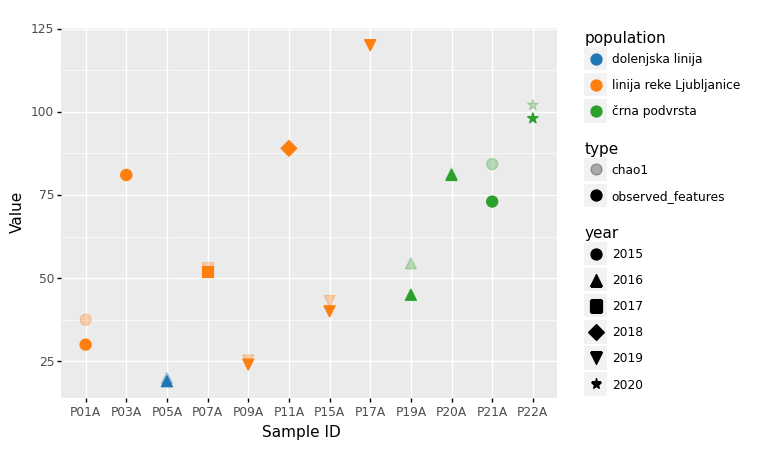

<ggplot: (8760809703930)>

In [43]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='value', shape='year', color='population', alpha='type'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='Value')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
)

p.save('./results/bacteria_obs-feat_chao1.png')

p

In [46]:
#ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)

# fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# ax=axs[0]
# ax.scatter(ndf.index, ndf.observed_features, color="C"+ndf.groupby("population").ngroup().astype(str))
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)

# ax=axs[1]
# ax.scatter(ndf.index, ndf.shannon_entropy)
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)


# plt.tight_layout()

In [53]:
ndf

observed_features  fisher_alpha       chao1  shannon_entropy   simpson  \
P01A               30.0      3.328980   37.500000         0.342088  0.073700   
P03A               81.0     10.272369   81.000000         4.178791  0.876984   
P05A               19.0      1.995016   20.000000         0.118272  0.022553   
P07A               52.0      6.197573   53.200000         2.277559  0.708911   
P09A               24.0      2.591147   25.250000         0.482597  0.137594   
P11A               89.0     11.443553   89.000000         5.284557  0.957211   
P15A               40.0      4.604325   43.111111         1.495559  0.498991   
P17A              120.0     16.143365  120.000000         2.742021  0.562882   
P19A               45.0      5.260529   54.428571         0.181783  0.033571   
P20A               81.0     10.272369   81.500000         1.895221  0.607079   
P21A               73.0      9.120273   84.250000         0.505607  0.097858   
P22A               98.0     12.782554  102.000000         3.965160  0.876302   

      simpson_e sample        location         origin  year parkelj specimen  \
P01A   0.035985   P01A  Planinska_jama      Paa200_t0  2015      no   Paa200   
P03A   0.100358   P03A  Planinska_jama      Paa201_t0  2015      no   Paa201   
P05A   0.053846   P05A           Stobe    Paa204_t10d  2016      no   Paa204   
P07A   0.066065   P07A  Planinska_jama      Paa209_t0  2017      no   Paa209   
P09A   0.048314   P09A  Planinska_jama      Paa210_t0  2019      no   Paa210   
P11A   0.262590   P11A  Planinska_jama      Paa211_t0  2018      no   Paa211   
P15A   0.049899   P15A  Planinska_jama      Paa220_t0  2019      no   Paa220   
P17A   0.019064   P17A  Planinska_jama      Paa221_t0  2019      no   Paa221   
P19A   0.022994   P19A          Obrsec  PB271_parkelj  2016     yes    PB271   
P20A   0.031420   P20A          Obrsec  PB272_parkelj  2016     yes    PB272   
P21A   0.015185   P21A       Jelsevnik  PB644_parkelj  2015     yes    PB644   
P22A   0.082492   P22A          Obrsec  PAP20_parkelj  2020     yes    PAP20   

                   population  color  
P01A  linija reke Ljubljanice      1  
P03A  linija reke Ljubljanice      1  
P05A         dolenjska linija      0  
P07A  linija reke Ljubljanice      1  
P09A  linija reke Ljubljanice      1  
P11A  linija reke Ljubljanice      1  
P15A  linija reke Ljubljanice      1  
P17A  linija reke Ljubljanice      1  
P19A            črna podvrsta      2  
P20A            črna podvrsta      2  
P21A            črna podvrsta      2  
P22A            črna podvrsta      2

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_shannon.png


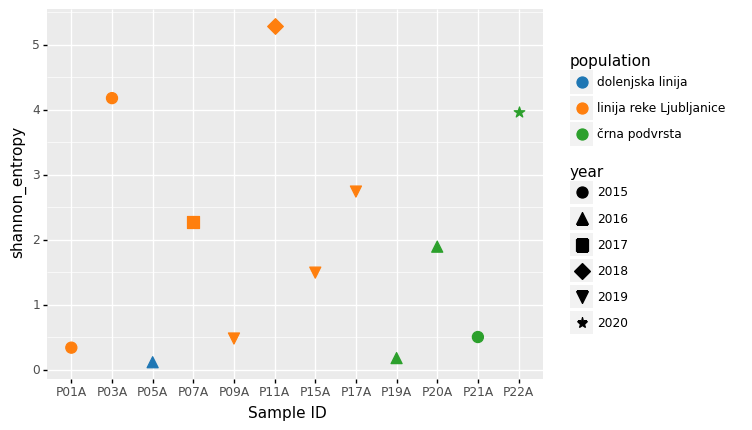

<ggplot: (8760807463674)>

In [56]:
shannon = (
    ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='shannon_entropy')
    + scale_color_manual(['C0', 'C1', 'C2'])
)

shannon.save('./results/bacteria_shannon.png')
shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson_e.png


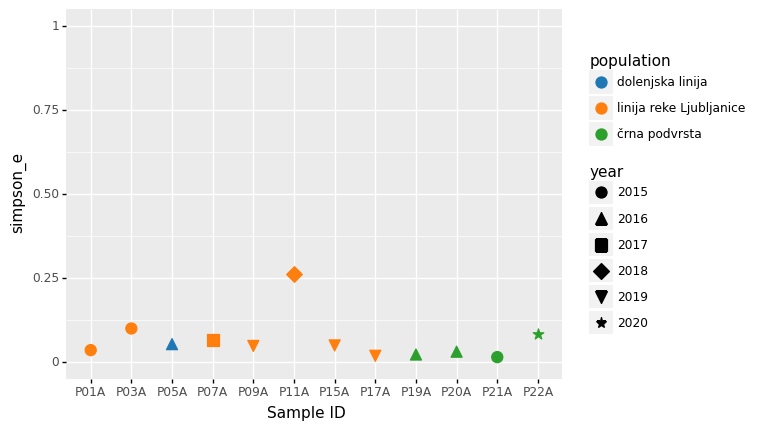

<ggplot: (8760807801878)>

In [61]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/bacteria_simpson_e.png')
simpson 

In [ ]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [ ]:
# # simpson viz
# visualizations['simpson']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

In [ ]:
# observed_features viz
visualizations['observed_features']

In [ ]:
# chao1 viz
visualizations['chao1']

In [ ]:
# shannon viz
visualizations['shannon']

### BETA DIVERSITY

In [ ]:
# make a subset, filter out dolenjska linija P05A
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('linija reke Ljubljanice', 'črna podvrsta')"
)

In [ ]:
# make a subset, filter out P07A (2017), P11A (2018), P22A (2020); leave 2015, 2016, 2019
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [ ]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 27291
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

In [ ]:
depth = 27291
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

#### PERMANOVA

In [ ]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization
# statistično značilno skupine enake - potrjena nulta hpoteza

In [ ]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

# ne moremo trdit da so si med leti enake

#### PERMANOVA ADONIS

Thefunction partitions sums of squares of a multivariate data set, and is
directly analogous to MANOVA (multivariate analysis of variance). This
action differs from beta_group_significance in that it accepts R formulae
to perform multi-way ADONIS tests; beta_group_signficance only performs
one-way tests.

In [ ]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population+year"
)

adonis.visualization

In [ ]:
adonis2 = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year+population"
)

adonis2.visualization

In [ ]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population*year"
)

adonis.visualization

In [ ]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year*population"
)

adonis.visualization

#### ANOSIM

In [ ]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

In [ ]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization